<a href="https://colab.research.google.com/github/jorgewellison/classifiers-tcc/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Configurações iniciais**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Importação das bibliotecas**

In [2]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, export
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn import preprocessing


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


**Importando previsores e classe (tratados no pré-processamento)**

previsores -> variáveis independentes - X

---



classe -> variável dependente - y

In [3]:
previsores = pd.read_csv("/content/drive/My Drive/Colab Notebooks/covid-idhm/previsores_.csv") 
classe_inc = pd.read_csv("/content/drive/My Drive/Colab Notebooks/covid-idhm/classe_inc.csv") 
classe_mort = pd.read_csv("/content/drive/My Drive/Colab Notebooks/covid-idhm/classe_mort.csv")

#**Criação e treinamento dos modelos**

##**Incidência**##

**Treinamento**

---



In [4]:
svm_inc = SVC()
svm_inc = svm_inc.fit(previsores, classe_inc.values.ravel())

##**Mortalidade**##

**Treinamento**

---



In [5]:
svm_mort = SVC()
svm_mort.fit(previsores, classe_mort.values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#**Testes com validação cruzada**

**Testes com validação cruzada**

**Criação do KFold com 10 iterações e Shuffle para embaralhar as linhas, desagrupando os municipios de seus estados**

In [9]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)

In [10]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score, average = 'macro'),
           'recall' : make_scorer(recall_score, average = 'macro'), 
           'f1_score' : make_scorer(f1_score, average = 'macro')}

##Testes de incidência##

In [13]:
scores = cross_validate(svm_inc,
                             previsores,
                             classe_inc.values.ravel(),
                             scoring=scoring,
                             cv=cv,
                             return_train_score=False)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

###Avaliação dos testes###

In [14]:
scores

{'fit_time': array([3.36645913, 3.40252256, 3.34540653, 3.31621504, 3.31653619,
        3.26896858, 3.37005758, 3.37038374, 3.38485742, 3.32908225]),
 'score_time': array([0.27720761, 0.27786922, 0.27997708, 0.27507949, 0.2731185 ,
        0.26314974, 0.27947021, 0.27440667, 0.27867794, 0.2796576 ]),
 'test_accuracy': array([0.61938959, 0.64631957, 0.59425494, 0.5978456 , 0.58707361,
        0.59352518, 0.63129496, 0.64928058, 0.6205036 , 0.64208633]),
 'test_f1_score': array([0.41938891, 0.44062688, 0.40656871, 0.39828993, 0.39547145,
        0.39676246, 0.42672877, 0.44192612, 0.42115987, 0.43539153]),
 'test_precision': array([0.4524027 , 0.47295699, 0.44959448, 0.44029316, 0.43559832,
        0.44454756, 0.46363718, 0.46873563, 0.44935923, 0.46034913]),
 'test_recall': array([0.45058651, 0.46880768, 0.44831095, 0.43074866, 0.43292129,
        0.43492595, 0.46028932, 0.46891086, 0.45041816, 0.46353509])}

##Testes de mortalidade##

In [16]:
#a função cross_validate recebe por parâmetro o modelo
#todos os dados para treino, os dados de classes, a quandidade de folds e o metodo de avaliação

scores2 = cross_validate(svm_mort, 
                         previsores, 
                         classe_mort.values.ravel(),
                         scoring=scoring,
                         cv=cv,
                         return_train_score=False)

###Avaliação dos testes###

In [17]:
scores2

{'fit_time': array([3.64356399, 3.63520861, 3.65477467, 3.65852785, 3.66942668,
        3.59854341, 3.66877294, 3.58970356, 3.66004896, 3.61767268]),
 'score_time': array([0.28837562, 0.2916429 , 0.29654408, 0.2946074 , 0.2979908 ,
        0.28176951, 0.28993797, 0.28904653, 0.29072714, 0.29289746]),
 'test_accuracy': array([0.58527828, 0.59964093, 0.56014363, 0.58168761, 0.59066427,
        0.57014388, 0.56834532, 0.60251799, 0.57733813, 0.56654676]),
 'test_f1_score': array([0.47314738, 0.48625044, 0.42245746, 0.42336418, 0.45364374,
        0.44833501, 0.43687426, 0.47093353, 0.45497906, 0.44725272]),
 'test_precision': array([0.6771795 , 0.65726233, 0.57921577, 0.52130326, 0.75366692,
        0.58915906, 0.65985782, 0.64934351, 0.63115834, 0.59337751]),
 'test_recall': array([0.48043645, 0.50093673, 0.47015294, 0.46297004, 0.48925294,
        0.47499445, 0.47635974, 0.5023292 , 0.4877551 , 0.48055723])}

# **Predição e Matriz de confusão**

### Predição e Matriz da incidência

In [20]:
predictions = cross_val_predict(svm_inc, previsores, classe_inc.values.ravel(), cv=cv)
confusao = confusion_matrix(classe_inc.values.ravel(), predictions)
confusao

array([[1143,    0, 1491],
       [  69,    0,  362],
       [ 203,    0, 2297]])

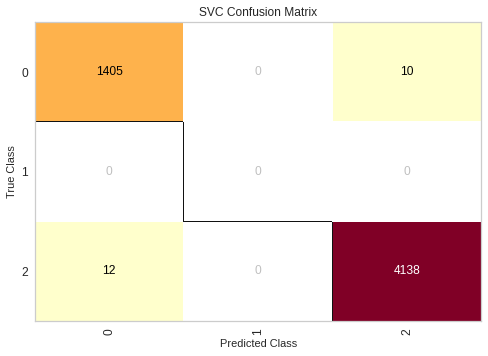

In [24]:
v = ConfusionMatrix(SVC())
v.fit(previsores, classe_inc.values.ravel())
v.score(previsores, predictions)
v.poof()

### Predição e Matriz da mortalidade

In [25]:
predictions2 = cross_val_predict(svm_mort, previsores, classe_mort.values.ravel(), cv=cv)
confusao2 = confusion_matrix(classe_mort.values.ravel(), predictions2)
confusao2

array([[1953,    3,  206],
       [ 530,   58,  241],
       [1327,   29, 1218]])

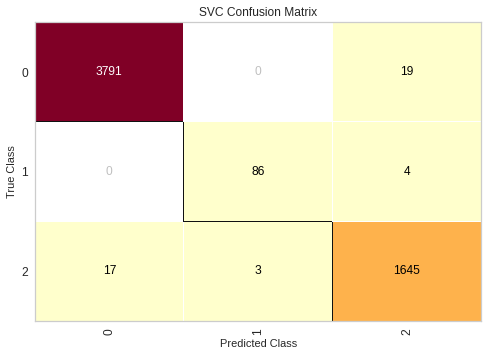

In [28]:
v2 = ConfusionMatrix(SVC())
v2.fit(previsores, classe_mort.values.ravel())
v2.score(previsores, predictions2)
v2.poof()

# **Métricas de avaliação**

**Predição de Incidência**

In [29]:
metrics.accuracy_score(classe_inc, predictions)

0.6181491464510332

In [32]:
metrics.precision_score(classe_inc.values.ravel(), predictions, average=None)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.80777385, 0.        , 0.55349398])

In [33]:
metrics.recall_score(classe_inc, predictions, average=None)

array([0.43394077, 0.        , 0.9188    ])

In [34]:
metrics.f1_score(classe_inc, predictions, average=None)

array([0.56458385, 0.        , 0.69082707])

**Predição de Mortalidade**

In [35]:
metrics.accuracy_score(classe_mort, predictions2)

0.5802336028751123

In [36]:
metrics.precision_score(classe_mort, predictions2, average=None)

array([0.51259843, 0.64444444, 0.73153153])

In [37]:
metrics.recall_score(classe_mort, predictions2, average=None)

array([0.90333025, 0.06996381, 0.47319347])

In [38]:
metrics.f1_score(classe_mort, predictions2, average=None)

array([0.65405224, 0.12622416, 0.57466384])